In [21]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [22]:
#Adding seed
seed = 7
numpy.random.seed(seed)

In [23]:
# Loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape[1:]

(32, 32, 3)

In [24]:
#Normalize the inputs

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test

In [25]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [26]:
#Creating the model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [27]:
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [28]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [29]:
#Fit the model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/3
1563/1563 [==============================] - 240s 153ms/step - loss: 1.9043 - accuracy: 0.3082 - val_loss: 1.4877 - val_accuracy: 0.4784
Epoch 2/3
1563/1563 [==============================] - 237s 152ms/step - loss: 1.4628 - accuracy: 0.4723 - val_loss: 1.3322 - val_accuracy: 0.5272
Epoch 3/3
1563/1563 [==============================] - 238s 152ms/step - loss: 1.3610 - accuracy: 0.5093 - val_loss: 1.2614 - val_accuracy: 0.5539


In [51]:
#Evaluating the model to find the Accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 55.39%


In [33]:
# Making the Performance changes according to the ICP

m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))

In [36]:
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [37]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [39]:
history1=m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/3
391/391 [==============================] - 415s 1s/step - loss: 2.1712 - accuracy: 0.1865 - val_loss: 1.9220 - val_accuracy: 0.3150
Epoch 2/3
391/391 [==============================] - 414s 1s/step - loss: 1.8509 - accuracy: 0.3179 - val_loss: 1.6767 - val_accuracy: 0.4020
Epoch 3/3
391/391 [==============================] - 415s 1s/step - loss: 1.6508 - accuracy: 0.3995 - val_loss: 1.5184 - val_accuracy: 0.4579


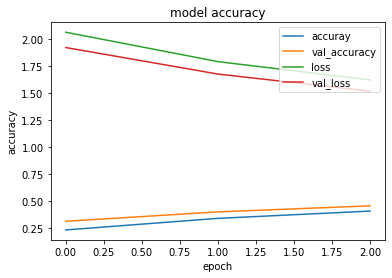

In [41]:
# Plotting the history with Accuracy and Loss data

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()


In [52]:
scores = m1.evaluate(X_test, y_test, verbose=1)
print('Test loss score is :', scores[0])
print('Test accuracy score is :', scores[1])
print("Accuracy is : %.2f%%" % (scores[1]*100))

313/313 [==============================] - 20s 65ms/step - loss: 1.5184 - accuracy: 0.4579
Test loss score is : 1.5183993577957153
Test accuracy score is : 0.4578999876976013
Accuracy is : 45.79%


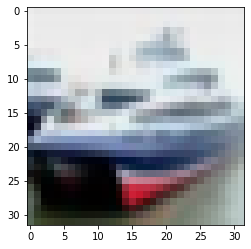

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


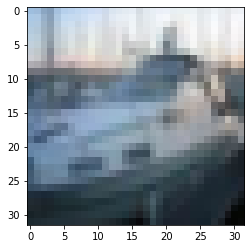

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


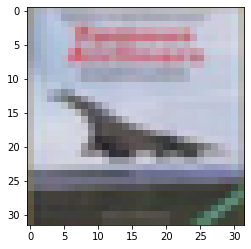

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 8


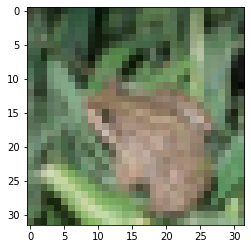

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 4


In [46]:
import matplotlib.pyplot as plt
for k in range(1,5):
    plt.imshow(X_test[k,:,:])  
    plt.show()
    y=model.predict_classes(X_test[[k],:])
    print("actual",y_test[k],"predicted",y[0])


In [48]:
m1.save("my_model.h5")
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('my_model.h5')

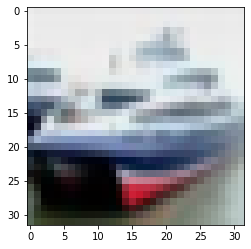

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


actual [8] predicted 1


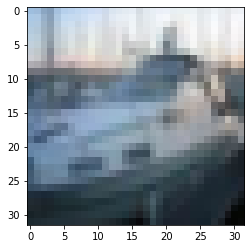

actual [8] predicted 8


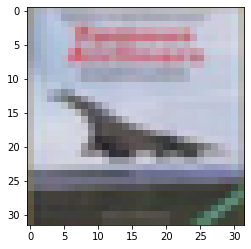

actual [0] predicted 8


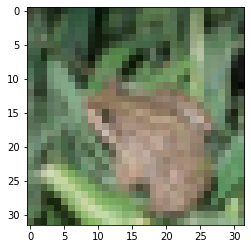

actual [6] predicted 4


In [49]:
#Bonus Question
#Predicting the first four images of the h5 model

import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=new_model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])